In [2]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True


# Bar Charts

In [3]:
# The flavor of ice cream is a categorical variable
icecream = Table().with_columns(
    'Flavor', make_array('Chocolate', 'Strawberry', 'Vanilla'),
    'Number of Cartons', make_array(16, 5, 9)
)
icecream

Flavor,Number of Cartons
Chocolate,16
Strawberry,5
Vanilla,9


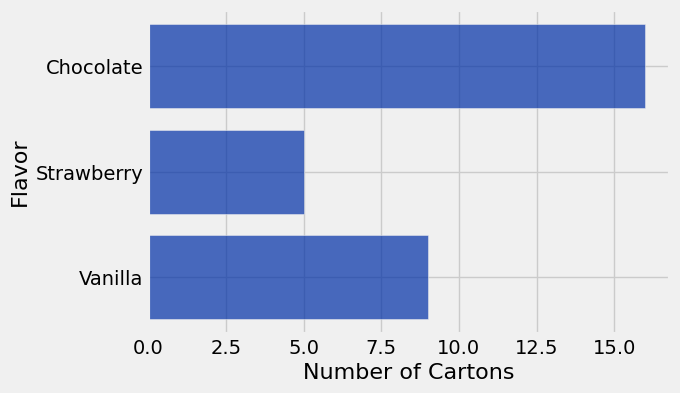

In [4]:
icecream.barh('Flavor', 'Number of Cartons')
# or simply
# icecream.barh('Flavor')

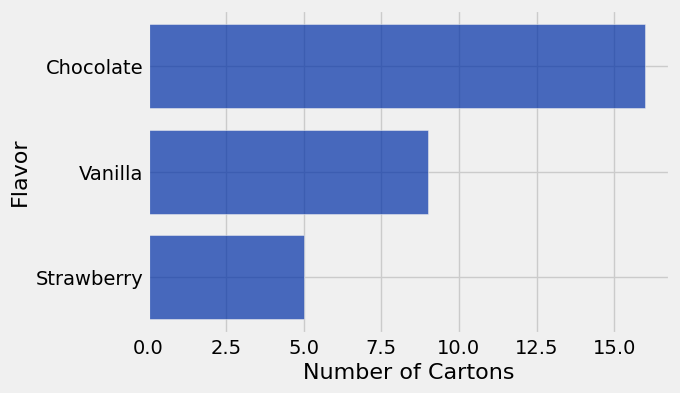

In [5]:
# Even better if you sort first
icecream = icecream.sort('Number of Cartons', descending = True)
icecream.barh('Flavor')

# Practice
Plot the ten movies with the *lowest* adjusted gross as a bar chart.
The category is the name of the movie.
The "frequencies" are the adjusted gross.

In [6]:
# Highest grossing movies as of 2017
top_movies = Table.read_table('top_movies_2017.csv')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


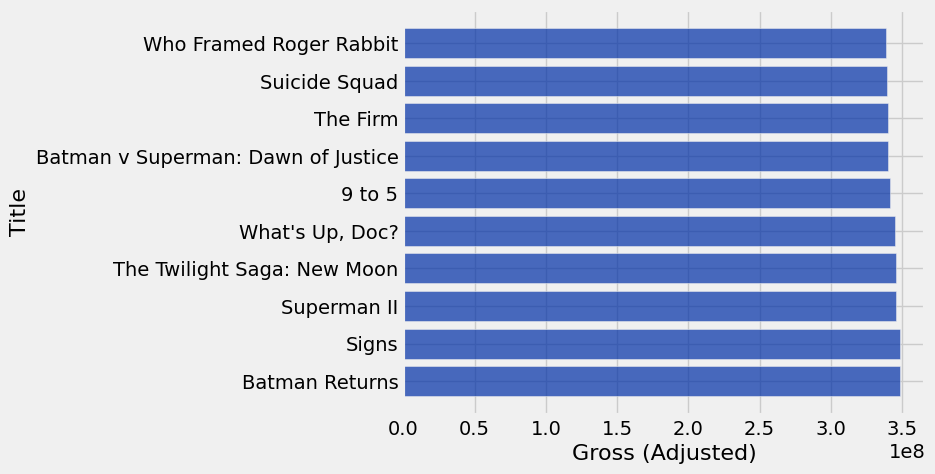

In [35]:
lol = top_movies.sort('Gross (Adjusted)')
worst_ten = lol.take(np.arange(10))
worst_ten.barh('Title', 'Gross (Adjusted)')


# Grouping

In [37]:
top_movies = Table.read_table('top_movies_2017.csv')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


In [40]:
studio_distribution = top_movies.group('Studio')
studio_distribution

Studio,count
AVCO,1
Buena Vista,35
Columbia,9
Disney,11
Dreamworks,3
Fox,24
IFC,1
Lionsgate,3
MGM,7
Metro,1


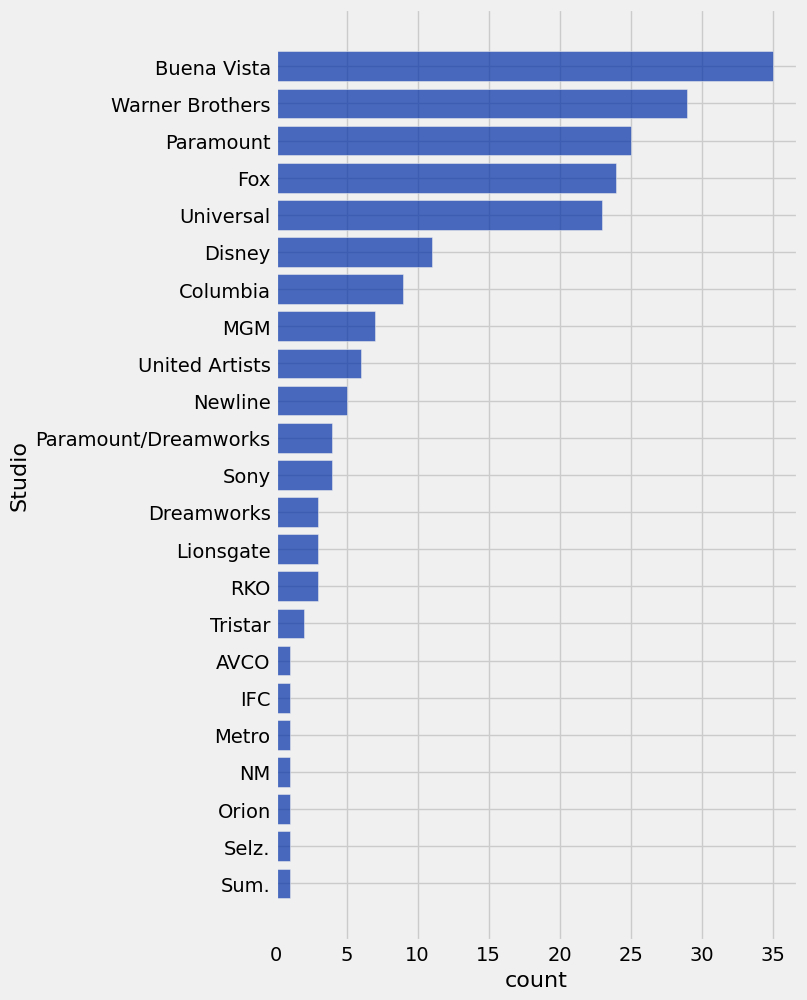

In [41]:
studio_distribution = studio_distribution.sort('count', descending = True)
studio_distribution.barh('Studio')

# Practice
Group the movies in top_movies by release year and plot the resulting frequencies.

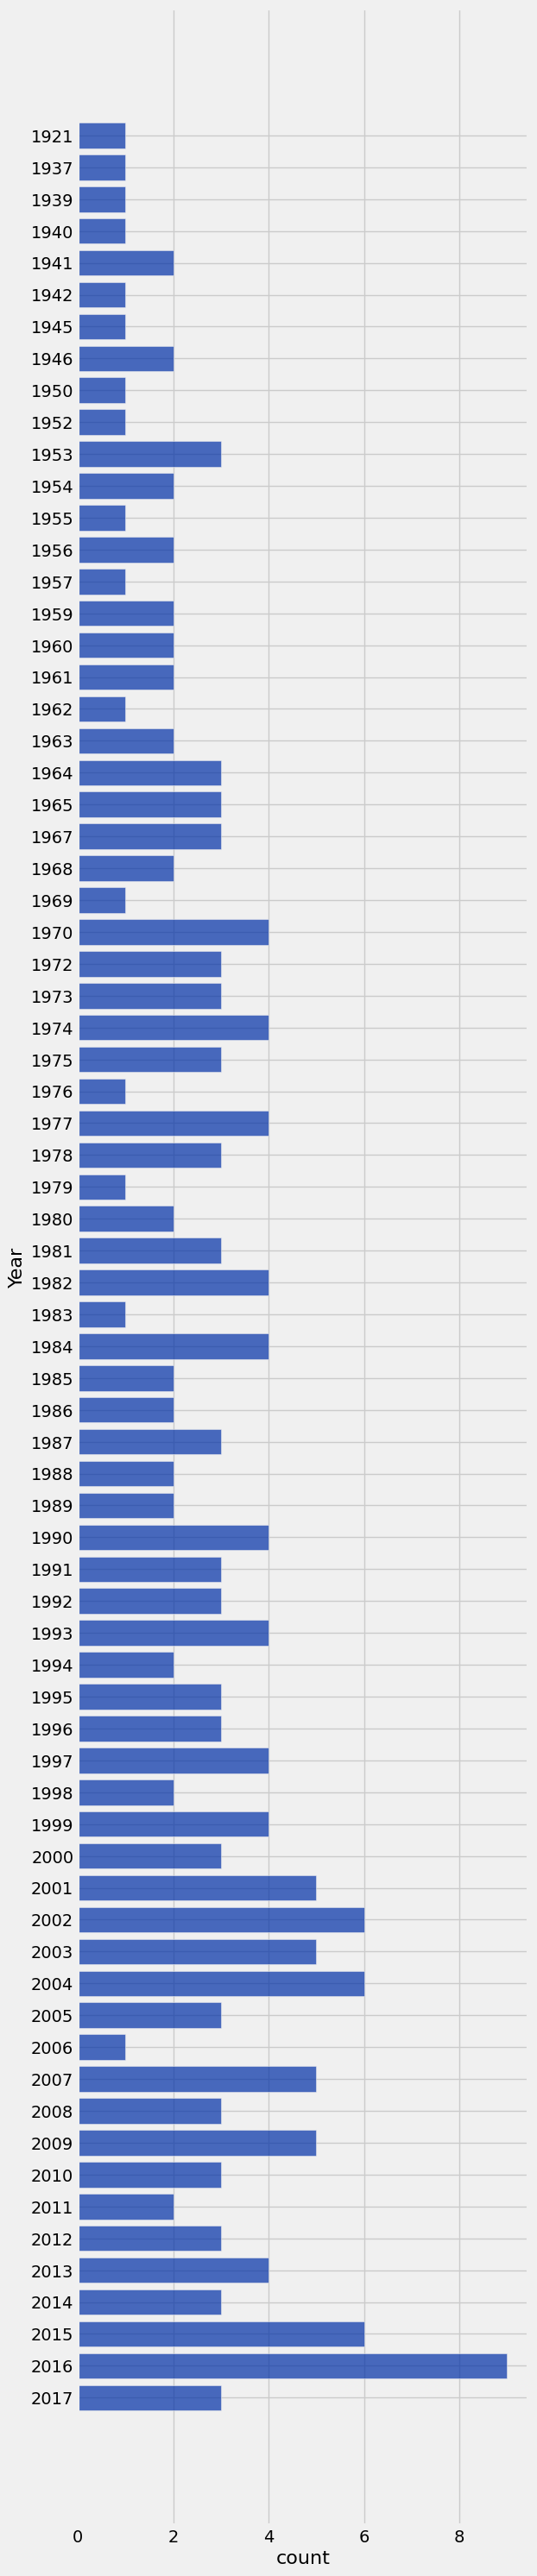

In [42]:
release_year = top_movies.group('Year')
release_year.barh('Year')

# Binning
Lets put the movies into five-year bins and plot again.

In [43]:
# Generate 10 equally spaced bins, but it's not great for a variable like Year
auto_binned_movies = top_movies.bin('Year', bins = 10)
auto_binned_movies.show()

bin,Year count
1921,1
1930.6,3
1940.2,6
1949.8,13
1959.4,18
1969,26
1978.6,24
1988.2,28
1997.8,40
2007.4,41


In [44]:
# Use arange to create specific bins
max_year = max(top_movies.column('Year'))
min_year = min(top_movies.column('Year'))
print(min_year, max_year)

1921 2017


In [45]:
year_bins = np.arange(1921, 2018, 9)
year_bins

array([1921, 1930, 1939, 1948, 1957, 1966, 1975, 1984, 1993, 2002, 2011])

In [46]:
# Appears to have no movies released after 2011 because the last bin is always empty.
manual_binned_movies = top_movies.bin('Year', bins = year_bins)
manual_binned_movies.show()

bin,Year count
1921,1
1930,1
1939,8
1948,10
1957,16
1966,20
1975,22
1984,25
1993,30
2002,39


In [ ]:
# We can fix it by making sure the last number incorporates our max year.
year_bins = np.arange(1921, 2021, 9)
manual_binned_movies = top_movies.bin('Year', bins = year_bins)
manual_binned_movies.show()


bin,Year count
1921,1
1930,1
1939,8
1948,10
1957,16
1966,20
1975,22
1984,25
1993,30
2002,37


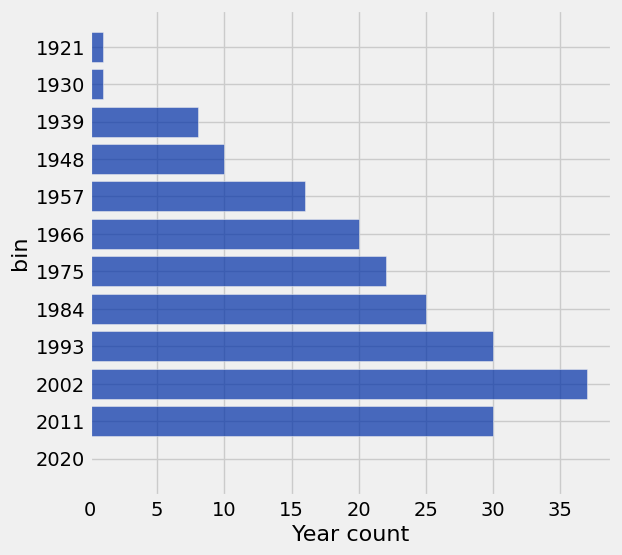

In [ ]:
manual_binned_movies.barh('bin')

# Practice
Find reasonable bin sizes for adjusted gross. Aim for ten or so nonempty bins.
Bin the data and plot the resulting frequencies.

In [57]:
min_adj_gross= min(top_movies.column('Gross (Adjusted)'))
max_adj_gross= max(top_movies.column('Gross (Adjusted)'))
print((max_adj_gross-min_adj_gross) / 10)
print(min_adj_gross, max_adj_gross)
gross_bins = np.arange(300000000, 200000000, 1500000000)
gross_bins

145776760.0
338409100 1796176700


array([], dtype=int64)

In [ ]:
.bin('Gross (Adjusted)', bins = gross_bins)
.show()

AttributeError: 'numpy.ndarray' object has no attribute 'bin'